# Dense Neural Network - Tensor

## 1. Import data

In [1]:
# Disable warning
import numpy as np
print(np.__version__)
import pandas as pd

1.26.4


In [2]:
# Importing all datasets
df_smoke = pd.read_csv("smoke_detection_iot.csv")
df_smoke = df_smoke.drop(columns=["Unnamed: 0"])

## 2. Inspect DataFrame

In [3]:
df_smoke.head(5)

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


## 3. Data preparation

#### Checking for null values

In [4]:
df_smoke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UTC             62630 non-null  int64  
 1   Temperature[C]  62630 non-null  float64
 2   Humidity[%]     62630 non-null  float64
 3   TVOC[ppb]       62630 non-null  int64  
 4   eCO2[ppm]       62630 non-null  int64  
 5   Raw H2          62630 non-null  int64  
 6   Raw Ethanol     62630 non-null  int64  
 7   Pressure[hPa]   62630 non-null  float64
 8   PM1.0           62630 non-null  float64
 9   PM2.5           62630 non-null  float64
 10  NC0.5           62630 non-null  float64
 11  NC1.0           62630 non-null  float64
 12  NC2.5           62630 non-null  float64
 13  CNT             62630 non-null  int64  
 14  Fire Alarm      62630 non-null  int64  
dtypes: float64(8), int64(7)
memory usage: 7.2 MB


From the distribution shown above, you can see that there no null values in the data.

## 4. Test-Train Split

In [5]:
# Putting feature variable to X
X = df_smoke.drop(['UTC','Fire Alarm'], axis=1)
X.head()

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT
0,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0
1,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1
2,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2
3,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3
4,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4


In [6]:
# Putting response variable to y
y = df_smoke['Fire Alarm']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Fire Alarm, dtype: int64

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
columns = list(X.columns)

X[columns] = scaler.fit_transform(X[columns])
print(X.shape)
X.head()

(62630, 13)


,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT
0,0.280622,0.994947,-0.248614,-0.141679,-2.335935,-2.025006,0.831761,-0.109043,-0.09334,-0.115215,-0.091924,-0.073889,-1.383476
1,0.281666,0.917115,-0.248614,-0.141679,-2.192796,-1.810079,0.838521,-0.109043,-0.09334,-0.115215,-0.091924,-0.073889,-1.383344
2,0.282641,0.837028,-0.248614,-0.141679,-2.086359,-1.624683,0.834014,-0.109043,-0.09334,-0.115215,-0.091924,-0.073889,-1.383212
3,0.283686,0.760324,-0.248614,-0.141679,-2.027636,-1.485227,0.832512,-0.109043,-0.09334,-0.115215,-0.091924,-0.073889,-1.383081
4,0.284730,0.693773,-0.248614,-0.141679,-1.979923,-1.367099,0.838521,-0.109043,-0.09334,-0.115215,-0.091924,-0.073889,-1.382949


#### Reshape for CNN (e.g., window size of 5 timesteps for each sample)

In [8]:
window_size = 5
X_reshaped = []
y_reshaped = []

for i in range(len(X) - window_size + 1):
    X_reshaped.append(X[i:i + window_size])
    y_reshaped.append(y[i + window_size - 1])

X_reshaped = np.array(X_reshaped)
y_reshaped = np.array(y_reshaped)

#### Splitting

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y_reshaped, train_size=0.8, random_state=100)
print(X_train.shape)

(50100, 5, 13)


## 5. Train First Neural Network with TensorFlow

### Building Model 

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

In [11]:
import matplotlib.pyplot as plt

def plot_over_fitting_validation(history):
    # Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()
    
    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

In [12]:
model = Sequential([
    Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    MaxPooling1D(pool_size=1),
    Conv1D(filters=128, kernel_size=2, activation='relu'),
    MaxPooling1D(pool_size=1),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

C:\Users\HHP81HC\.conda\envs\master_thesis\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy')
    ]
)

In [14]:
history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/200
1566/1566 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9831 - loss: 0.0613 - val_accuracy: 0.9998 - val_loss: 0.0020
Epoch 2/200
1566/1566 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9989 - loss: 0.0063 - val_accuracy: 0.9998 - val_loss: 0.0014
Epoch 3/200
1566/1566 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9994 - loss: 0.0046 - val_accuracy: 0.9992 - val_loss: 0.0027
Epoch 4/200
1566/1566 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9989 - loss: 0.0045 - val_accuracy: 0.9998 - val_loss: 5.9288e-04
Epoch 5/200
1566/1566 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9996 - loss: 0.0028 - val_accuracy: 0.9998 - val_loss: 5.6641e-04
Epoch 6/200
1566/1566 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9995 - loss: 0.0021 - val_accuracy: 1.0000 - val_loss: 2.6913e-04
Epoch 7/200
1566/1566 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9992 - loss: 0.0291 - val_accuracy: 0.9966 - val_loss: 0.0119
Epoch 8/200
1566/1566 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.99

Evaluate the model

In [15]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

392/392 ━━━━━━━━━━━━━━━━━━━━ 0s 897us/step - accuracy: 1.0000 - loss: 1.9883e-08
Test Accuracy: 100.00%


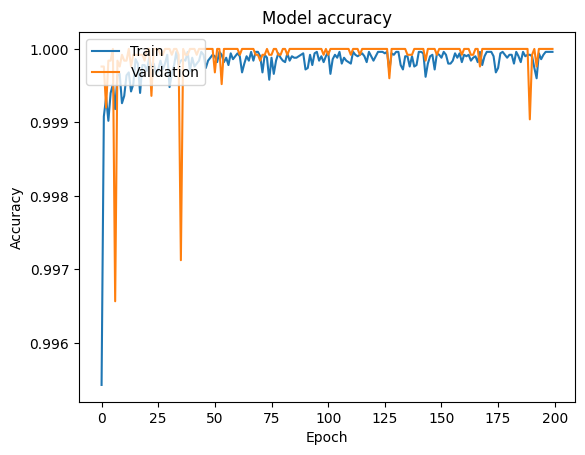

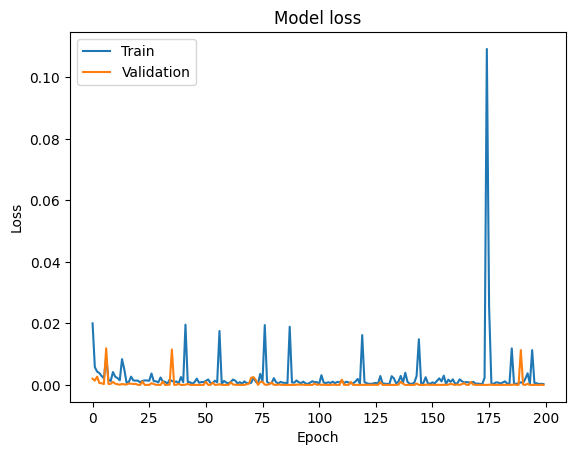

In [16]:
plot_over_fitting_validation(history)

## 6. Tunning Model

### Adjust the CNN Architecture

- Increase Filters: Increasing the number of filters can help the model learn more complex patterns.
- Use Batch Normalization: It can stabilize training and speed up convergence.

In [17]:
from tensorflow.keras.layers import BatchNormalization
model_changed_architecture = Sequential([
    Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    BatchNormalization(),
    MaxPooling1D(pool_size=1),

    Conv1D(filters=128, kernel_size=2, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(pool_size=1),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

In [18]:
model_changed_architecture.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy')
    ]
)
history = model_changed_architecture.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_test, y_test))
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Epoch 1/200
1566/1566 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9730 - loss: 0.0701 - val_accuracy: 0.9998 - val_loss: 0.0015
Epoch 2/200
1566/1566 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9966 - loss: 0.0127 - val_accuracy: 0.9994 - val_loss: 0.0031
Epoch 3/200
1566/1566 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9979 - loss: 0.0079 - val_accuracy: 0.9997 - val_loss: 8.4890e-04
Epoch 4/200
1566/1566 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9986 - loss: 0.0061 - val_accuracy: 0.9999 - val_loss: 4.4232e-04
Epoch 5/200
1566/1566 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9985 - loss: 0.0069 - val_accuracy: 0.9997 - val_loss: 0.0015
Epoch 6/200
1566/1566 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9982 - loss: 0.0062 - val_accuracy: 0.9997 - val_loss: 0.0017
Epoch 7/200
1566/1566 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9991 - loss: 0.0041 - val_accuracy: 0.9970 - val_loss: 0.0064
Epoch 8/200
1566/1566 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9993 -

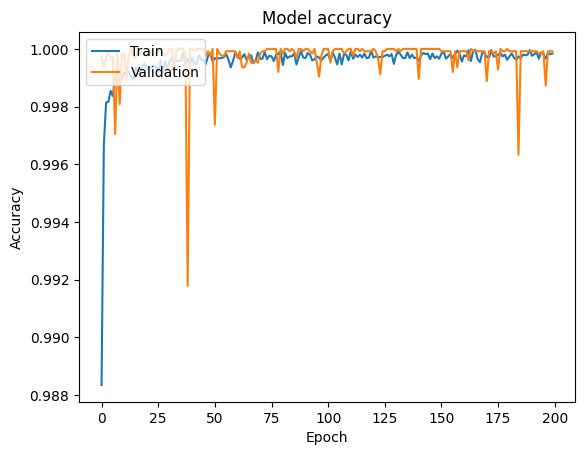

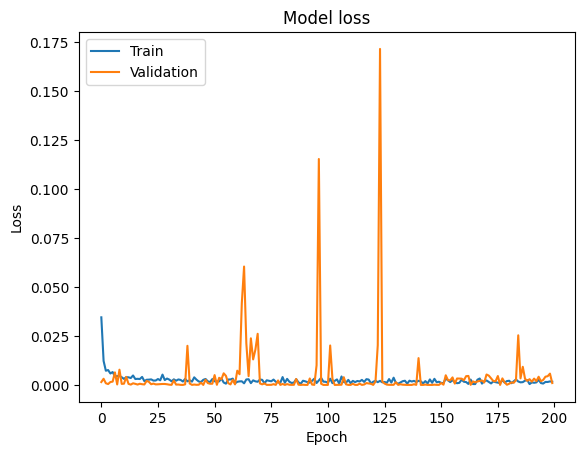

In [19]:
plot_over_fitting_validation(history)

### Use Early Stopping and Reduce Learning Rate

In [20]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stopping_model = Sequential([
    Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    BatchNormalization(),
    MaxPooling1D(pool_size=1),

    Conv1D(filters=128, kernel_size=2, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(pool_size=1),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# Early stopping to prevent overfitting and learning rate reduction for better convergence
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)

In [21]:
early_stopping_model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy')
    ]
)

history_es = early_stopping_model.fit(
    X_train, y_train,
    epochs=200,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping, reduce_lr]
)
test_loss, test_accuracy = early_stopping_model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Epoch 1/200
1566/1566 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9746 - loss: 0.0637 - val_accuracy: 0.9993 - val_loss: 0.0026 - learning_rate: 0.0010
Epoch 2/200
1566/1566 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9960 - loss: 0.0155 - val_accuracy: 0.9996 - val_loss: 0.0014 - learning_rate: 0.0010
Epoch 3/200
1566/1566 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9975 - loss: 0.0089 - val_accuracy: 0.9959 - val_loss: 0.0102 - learning_rate: 0.0010
Epoch 4/200
1566/1566 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9983 - loss: 0.0062 - val_accuracy: 0.9994 - val_loss: 0.0037 - learning_rate: 0.0010
Epoch 5/200
1566/1566 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9973 - loss: 0.0106 - val_accuracy: 0.9998 - val_loss: 4.6620e-04 - learning_rate: 0.0010
Epoch 6/200
1566/1566 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9984 - loss: 0.0060 - val_accuracy: 0.9997 - val_loss: 0.0012 - learning_rate: 0.0010
Epoch 7/200
1566/1566 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy:

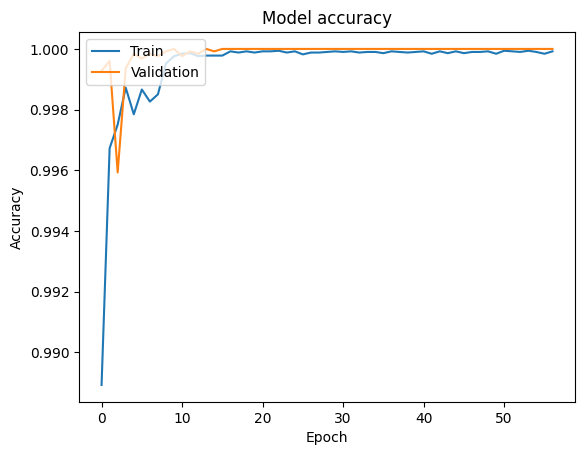

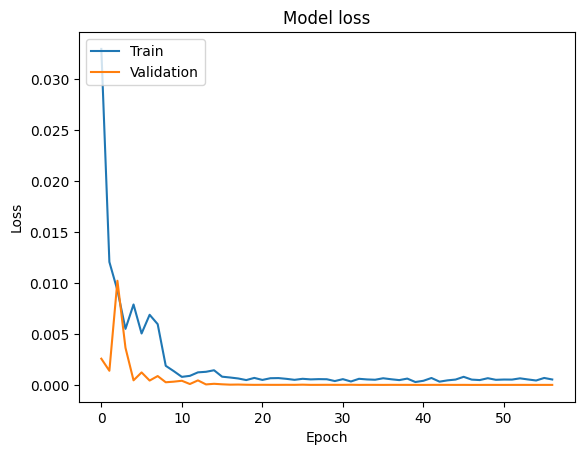

In [22]:
plot_over_fitting_validation(history_es)

### Making predictions on the final model

In [23]:
# Making predictions You can now use the predict() function to get prediction probabilities on the encoded test data:
predictions = early_stopping_model.predict(X_test)

392/392 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [24]:
prediction_classes_class = [
    'p' if prob > 0.5 else 'e' for prob in np.ravel(predictions)
]
# convert prediction probabilities to binary predictions
prediction_classes = [
    1 if prob > 0.5 else 0 for prob in np.ravel(predictions)
]

In [25]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, prediction_classes))

[[3634    0]
 [   0 8892]]


In [26]:
from sklearn.metrics import accuracy_score
print(f'Accuracy: {accuracy_score(y_test, prediction_classes):.4f}')

Accuracy: 1.0000


392/392 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


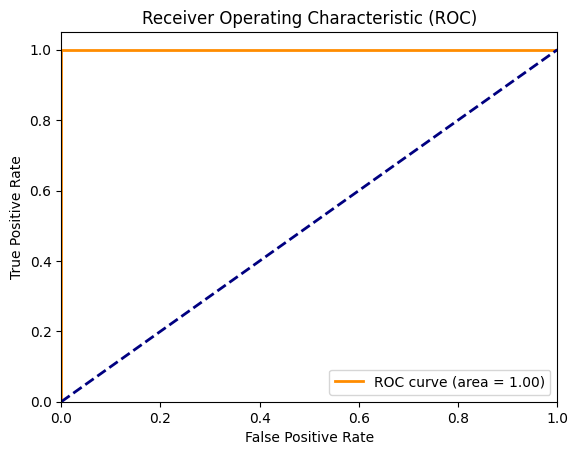

In [27]:
# Drawing the ROC curve for logistic regression using sklearn
def plot_roc_curve(X_test, y_test):
    import matplotlib.pyplot as plt
    from sklearn.metrics import roc_curve, auc
    
    # Get the predicted probabilities (for the positive class)
    y_pred_prob = model.predict(X_test)
    
    # Compute ROC curve and ROC area for each class
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    
    # Plotting the ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

plot_roc_curve(X_test, y_test)

392/392 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step


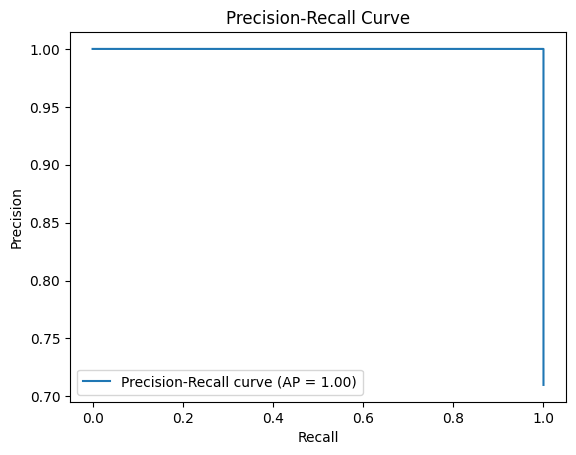

In [28]:
# Precision-Recall Curve
def plot_precision_recall_curve(X_test, y_test):
    import matplotlib.pyplot as plt
    from sklearn.metrics import precision_recall_curve, average_precision_score

    # Assuming y_test and y_pred_proba are defined
    # y_pred_proba is the predicted probabilities for the positive class (usually class 1)
    y_pred_prob = model.predict(X_test)
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
    average_precision = average_precision_score(y_test, y_pred_prob)
    
    # Plot the Precision-Recall curve
    plt.figure()
    plt.plot(recall, precision, label=f'Precision-Recall curve (AP = {average_precision:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc="best")
    plt.show()

plot_precision_recall_curve(X_test, y_test)